## Practice Dataset

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


Importing the dataframe

In [68]:
df = pd.read_excel('Practice dataset.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Metadata

In [69]:
# All the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [70]:
# Checking for missing values
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [71]:
# Checking for duplicate values
df.duplicated().sum()


0

In [72]:
# Descriptive statistics
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Data Visualization

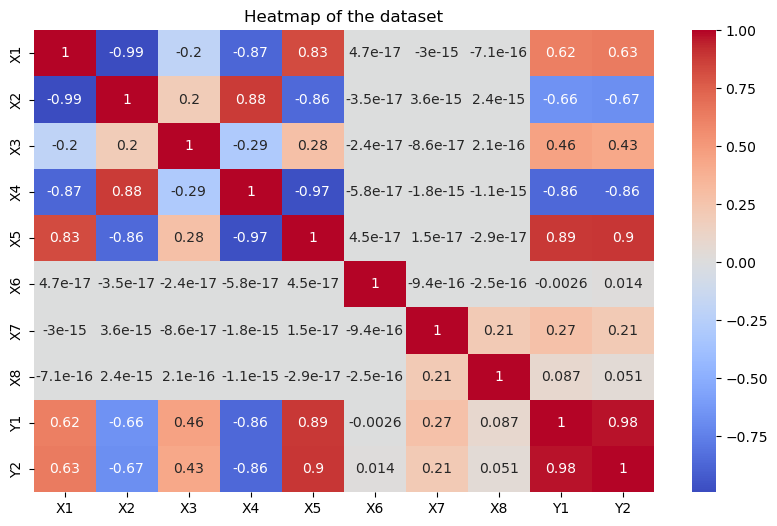

In [73]:
# heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of the dataset')
plt.show()

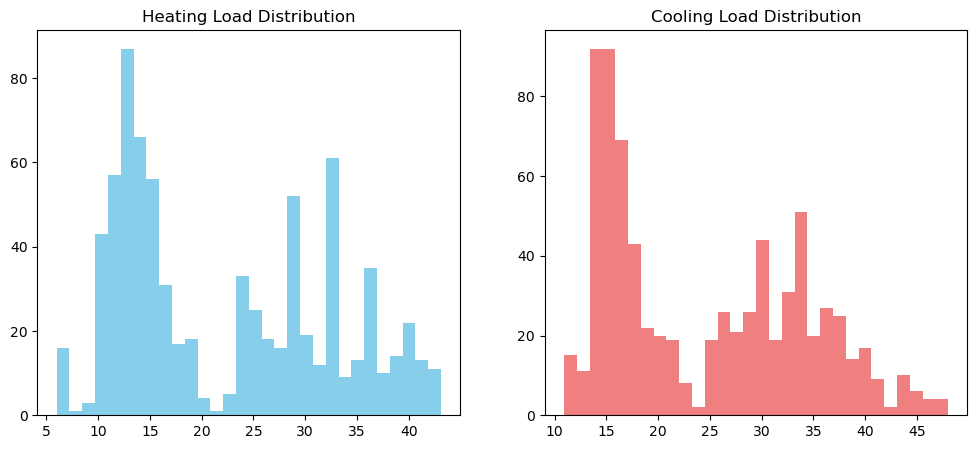

In [74]:
# Visualize the distribution of target variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Y1'], bins=30, color='skyblue')
plt.title('Heating Load Distribution')
plt.subplot(1, 2, 2)
plt.hist(df['Y2'], bins=30, color='lightcoral')
plt.title('Cooling Load Distribution')
plt.show()

In [75]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [76]:
x = df.drop(['Y1','Y2'], axis=1)
y = df.drop(['X1','X2','X3','X4','X5','X6','X7','X8'], axis=1)

In [77]:
y_heating = y['Y1']
y_cooling = y['Y2']

Ridge Regression for Heating Load

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_heating, test_size=0.2, random_state=0)

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Ridge Regression with hyperparameter tuning
ridge = Ridge()
# Define the hyperparameter grid for alpha values (regularization strength)
alpha_values = { 'alpha': np.logspace(-3, 3, 10)} # 10 values from 10^-3 to 10^3

ridge_cv = GridSearchCV(ridge, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(x_train, y_train) # Train Ridge regression model with cross-validation

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': np.logspace(-3, 3, 10)}, scoring='neg_mean_squared_error') 


# Best Ridge Model 
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(x_test) # Predictions on test data


# Ridge RMSE
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test,y_pred_ridge)
print("Best ridge Alpha :",ridge_cv.best_params_['alpha'])
print("RMSE :", ridge_rmse)
print("R2 :",r2_ridge)

Best ridge Alpha : 0.001
RMSE : 3.1788282595545687
R2 : 0.9084914397742132


Lasso Regression for Heating Load

In [80]:
from sklearn.linear_model import Lasso
# Lasso Regression with hyperparameter tuning
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, alpha_values, cv=5, scoring='neg_mean_squared_error')
# Define the hyperparameter grid for alpha values (regularization strength)
lasso_cv.fit(x_train, y_train) # Train Lasso regression model with cross-validation
GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': np.logspace(-3, -3, 10)}, scoring='neg_mean_squared_error')


# Best Lasso Model
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(x_test) # Predictions on test data



# Lasso RMSE
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test,y_pred_lasso)
print("Best Lasso Alpha :",lasso_cv.best_params_['alpha'])
print("RMSE :", lasso_rmse)
print("R2 :",r2_lasso)


c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.781e+01, tolerance: 5.007e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+02, tolerance: 4.787e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+02, tolerance: 

Best Lasso Alpha : 0.001
RMSE : 3.1916005738152298
R2 : 0.9077546122237674


c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+02, tolerance: 6.103e+00
  model = cd_fast.enet_coordinate_descent(


Evaluating Heating of both models using mean square error

In [81]:
from sklearn.metrics import mean_squared_error

y_pred_ridge = ridge_cv.predict(x_test)
y_pred_lasso = lasso_cv.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge MSE:", mse_ridge)
print("Lasso MSE:", mse_lasso)


Ridge MSE: 10.104949103742728
Lasso MSE: 10.186314222777705


Ridge Regression for Cooling Load

In [82]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y_cooling, test_size=0.2, random_state=0)

In [83]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Ridge Regression with hyperparameter tuning
ridge1 = Ridge()
# Define the hyperparameter grid for alpha values (regularization strength)
alpha_values = { 'alpha': np.logspace(-3, 3, 10)} # 10 values from 10^-3 to 10^3

ridge_cv1 = GridSearchCV(ridge1, alpha_values, cv=5, scoring='neg_mean_squared_error')
ridge_cv1.fit(x_train1, y_train1) # Train Ridge regression model with cross-validation

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': np.logspace(-3, 3, 10)}, scoring='neg_mean_squared_error') 


# Best Ridge Model 
best_ridge1 = ridge_cv1.best_estimator_
y_pred_ridge1 = best_ridge1.predict(x_test1) # Predictions on test data


# Ridge RMSE
ridge_rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred_ridge1))
r2_ridge1 = r2_score(y_test1,y_pred_ridge1)
print("Best ridge Alpha :",ridge_cv1.best_params_['alpha'])
print("RMSE :", ridge_rmse1)
print("R2 :",r2_ridge1)

Best ridge Alpha : 0.001
RMSE : 3.272220047068651
R2 : 0.8861585541962702


Lasso Regression for Cooling Load

In [84]:
from sklearn.linear_model import Lasso
# Lasso Regression with hyperparameter tuning
lasso1 = Lasso()
lasso_cv1 = GridSearchCV(lasso1, alpha_values, cv=5, scoring='neg_mean_squared_error')
# Define the hyperparameter grid for alpha values (regularization strength)
lasso_cv1.fit(x_train1, y_train1) # Train Lasso regression model with cross-validation
GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': np.logspace(-3, -3, 10)}, scoring='neg_mean_squared_error')


# Best Lasso Model
best_lasso1 = lasso_cv1.best_estimator_
y_pred_lasso1 = best_lasso1.predict(x_test) # Predictions on test data



# Lasso RMSE
lasso_rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred_lasso1))
r2_lasso1 = r2_score(y_test1,y_pred_lasso1)
print("Best Lasso Alpha :",lasso_cv1.best_params_['alpha'])
print("RMSE :", lasso_rmse1)
print("R2 :",r2_lasso1)


Best Lasso Alpha :

c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.519e+01, tolerance: 4.560e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.971e+02, tolerance: 4.315e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Neil\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.898e+01, tolerance: 

 0.001
RMSE : 3.281730256047722
R2 : 0.8854958669614633


Evaluating Cooling of both models using mean square error

In [85]:
from sklearn.metrics import mean_squared_error

y_pred_ridge1 = ridge_cv1.predict(x_test)
y_pred_lasso1 = lasso_cv1.predict(x_test)

mse_ridge1 = mean_squared_error(y_test1, y_pred_ridge1)
mse_lasso1 = mean_squared_error(y_test1, y_pred_lasso1)

print("Ridge MSE:", mse_ridge1)
print("Lasso MSE:", mse_lasso1)


Ridge MSE: 10.707424036437965
Lasso MSE: 10.769753473459048


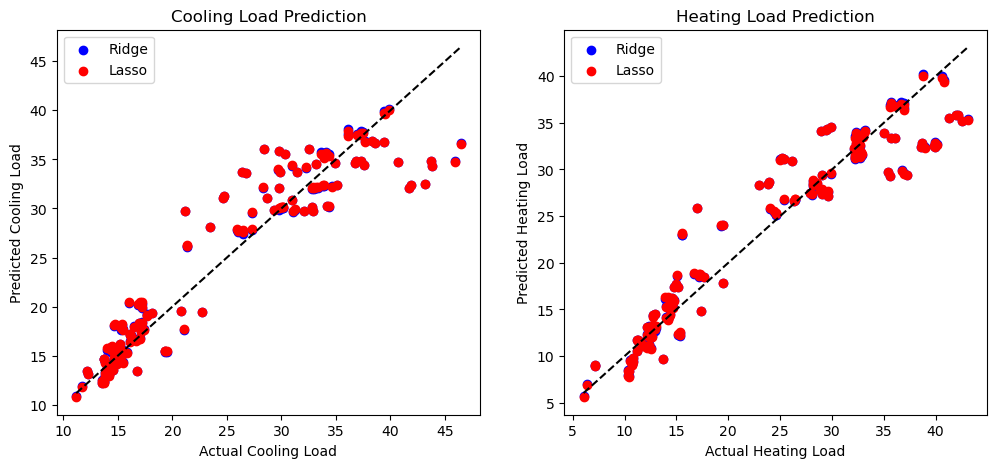

In [86]:
 # Ridge vs Lasso Comparison for Cooling Load
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test1, y_pred_ridge1, color='blue', label='Ridge')
plt.scatter(y_test1, y_pred_lasso1, color='red', label='Lasso')
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='black', linestyle='--')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')
plt.title('Cooling Load Prediction')
plt.legend()
# Ridge vs Lasso Comparison for Heating Load
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='blue', label='Ridge')
plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')
plt.title('Heating Load Prediction')
plt.legend()
plt.show()

In [91]:
# Extract coefficients from both Lasso models
lasso_coefs = best_lasso.coef_
lasso1_coefs = best_lasso1.coef_

# Create a DataFrame with the coefficients
coefs_df = pd.DataFrame([lasso_coefs, lasso1_coefs], index=['Lasso Model for Heating', 'Lasso Model for Cooling'], columns=x.columns)
coefs_df

,X1,X2,X3,X4,X5,X6,X7,X8
Lasso Model for Heating,-48.123597,-0.060907,0.054349,-0.010020,4.242992,-0.018314,19.757459,0.160407
Lasso Model for Cooling,-55.297681,-0.061855,0.037394,-0.006894,4.508389,0.144312,15.015196,0.024498


### Interpretation of Lasso Regression Coefficients

The table below shows the coefficients estimated by two Lasso regression models—one for predicting **Heating Load** and the other for **Cooling Load**—based on eight features (X1 to X8).

| Feature | Lasso Model for Heating | Lasso Model for Cooling |
|---------|-------------------------|-------------------------|
| **X1**  | -48.123597              | -55.297681              |
| **X2**  | -0.060907               | -0.061855               |
| **X3**  | 0.054349                | 0.037394                |
| **X4**  | -0.010020               | -0.006894               |
| **X5**  | 4.242992                | 4.508389                |
| **X6**  | -0.018314               | 0.144312                |
| **X7**  | 19.757459               | 15.015196               |
| **X8**  | 0.160407                | 0.024498                |

#### Key Points:

- **Magnitude & Impact:**
  - **X1 (Relative Compactness):**  
    - **Heating:** A coefficient of -48.12 indicates that for each one-unit increase in X1, the Heating Load decreases by about 48.12 units, holding all else constant.
    - **Cooling:** Similarly, a coefficient of -55.30 suggests a stronger negative impact on Cooling Load.
  - **X5 (Overall Height):**  
    - Positive coefficients in both models (≈4.24 for heating and ≈4.51 for cooling) indicate that as the overall height increases, both heating and cooling loads tend to increase.
  - **X7 (Glazing Area):**  
    - With coefficients of 19.76 (heating) and 15.02 (cooling), this feature shows a considerable positive influence on the target variables, though slightly more on Heating Load.

- **Direction of Effect (Sign of Coefficients):**
  - **Negative Coefficients (e.g., X1, X2, X4):**  
    - Indicate an inverse relationship. For instance, higher values of X1 are associated with lower energy loads.
  - **Positive Coefficients (e.g., X3, X5, X7, X8):**  
    - Suggest a direct relationship, where increases in these features lead to higher energy loads.

- **Differences Between Models:**
  - **X6 (Orientation):**  
    - For Heating Load, the coefficient is slightly negative (-0.0183), suggesting a minor decrease in heating load with an increase in orientation value.
    - For Cooling Load, the coefficient is positive (0.1443), indicating that a higher orientation value could slightly increase the cooling load.
  - **X8 (Glazing Area Distribution):**  
    - A modest positive impact on Heating Load (0.1604) but almost negligible for Cooling Load (0.0245).

- **Lasso Regularization:**
  - Lasso tends to shrink coefficients towards zero, and it can even set some coefficients exactly to zero if a feature is not useful. In this case, none of the coefficients are zero, which implies that all features are contributing to the predictions for both Heating and Cooling Loads, albeit with different levels of influence.

#### Overall Implications:
- **Relative Importance:**  
  - **X1** and **X7** have large absolute coefficients, suggesting they are among the most influential features in predicting both Heating and Cooling Loads.
- **Model Sensitivity:**  
  - The differences in coefficient signs and magnitudes (especially for X6) hint that the relationship between features and the target variables may differ between heating and cooling scenarios. This reinforces the need for tailored models or further feature engineering when predicting these energy loads.


### Model Performance Evaluation Using Mean Squared Error (MSE)

We evaluate the performance of Ridge and Lasso Regression models on two targets—Heating Load and Cooling Load—using MSE. The obtained MSE values are as follows:

#### Heating Load Prediction:
- **Ridge Regression MSE:** 10.104949103742728  
- **Lasso Regression MSE:** 10.186314222777705

#### Cooling Load Prediction:
- **Ridge Regression MSE:** 10.707424036437965  
- **Lasso Regression MSE:** 10.769753473459048

---

#### Interpretation:

1. **Heating Load Predictions:**
   - **Ridge Regression** achieves an MSE of approximately **10.105**, which is slightly lower than the **10.186** obtained by **Lasso Regression**.
   - This indicates that the Ridge model is marginally better at predicting Heating Load, as its predictions are on average closer to the actual values.

2. **Cooling Load Predictions:**
   - For Cooling Load, **Ridge Regression** records an MSE of about **10.707**, compared to **10.770** for **Lasso Regression**.
   - Again, the Ridge model shows a slight edge in performance over the Lasso model.

3. **Overall Comparison:**
   - **Ridge Regression** consistently demonstrates lower MSE values for both Heating and Cooling Load predictions.
   - The differences in MSE are relatively small, suggesting that both models are performing comparably. However, the slight advantage in Ridge's performance might make it the preferred choice if minimal improvement is desired.

4. **Conclusion:**
   - **MSE** is a measure of the average squared difference between the predicted and actual values. A lower MSE is indicative of better predictive accuracy.
   - Given the marginally lower MSE values for Ridge Regression across both tasks, it can be inferred that Ridge Regression might capture the underlying patterns in the data a bit more effectively than Lasso Regression for this particular dataset.
